In [71]:
# This is Final Exam for IBM Time Series course.
# I use monthly vw market data.

In [3]:
!pip install statsmodels==0.11.0
!pip install pmdarima

     |████████████████████████████████| 8.7 MB 1.8 MB/s            
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.13.1
    Uninstalling statsmodels-0.13.1:
      Successfully uninstalled statsmodels-0.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.19.0 requires statsmodels>=0.13, but you have statsmodels 0.11.0 which is incompatible.
plotnine 0.8.0 requires statsmodels>=0.12.1, but you have statsmodels 0.11.0 which is incompatible.
     |████████████████████████████████| 1.4 MB 284 kB/s            


In [72]:
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
plt.style.use('seaborn-white')
print(sm.__version__)

0.11.0


In [73]:
path = '../input/monthly-market-returns/mMKT.CSV'
df = pd.read_csv(path)
df.shape

(1146, 2)

In [74]:
df.head()

,date,mkt
0,192607,2.96
1,192608,2.64
2,192609,0.36
3,192610,-3.24
4,192611,2.53


In [75]:
df.date=pd.to_datetime(df.date,format='%Y%m')
df.date=df.date.dt.strftime("%Y-%m")

In [76]:
df.set_index('date', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1146 entries, 1926-07 to 2021-12
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mkt     1146 non-null   float64
dtypes: float64(1)
memory usage: 17.9+ KB


/opt/conda/lib/python3.7/site-packages/seaborn/relational.py:436: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  scout, = ax.plot([], [], **kws)
/opt/conda/lib/python3.7/site-packages/seaborn/relational.py:514: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  line, = ax.plot([], [], **kws)


<AxesSubplot:xlabel='date', ylabel='mkt'>

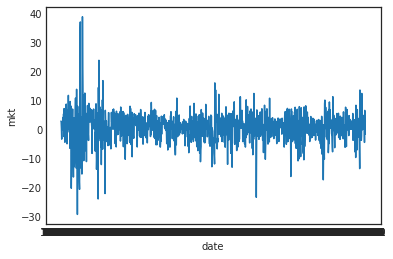

In [77]:
df.describe()
sns.lineplot(x=df.index, y='mkt', data=df)

In [78]:
# testing stationarity and seasonality
import statsmodels.tsa.stattools as ts

results = ts.adfuller(df)
results
# ts is stationary.

(-8.299754730569054,
 4.0482698873981886e-13,
 20,
 1125,
 {'1%': -3.4361760299117914,
  '5%': -2.8641125290596436,
  '10%': -2.5681396861234567},
 6931.732739371823)

/opt/conda/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:53: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lags = lags.astype(np.float)


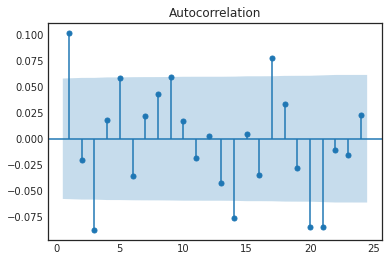

In [79]:
# forecasting using ARIMA

# first, see acf/pacf

sm.tsa.graphics.plot_acf(df.mkt, lags=24, zero=False);

/opt/conda/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:53: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lags = lags.astype(np.float)


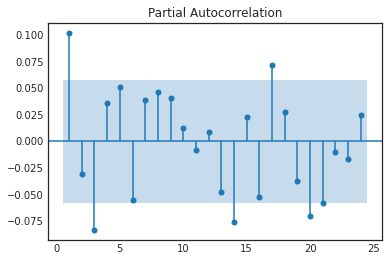

In [80]:
sm.tsa.graphics.plot_pacf(df.mkt, lags=24, zero=False);

In [81]:
# acf and pacf look like noise, not sure which arma to use.

from pmdarima.arima import auto_arima

train = df[0:900]
test = df[900:]

In [82]:
# try to autodetect arima order, use this: https://towardsdatascience.com/time-series-forecasting-using-auto-arima-in-python-bb83e49210cd

arima_model = auto_arima(train, start_p=0, start_q=1, d=0, max_p=12, max_d=0, max_q=12, seasonal=False, n_fits=50, steepwise=False)
arima_model

ARIMA(order=(0, 0, 1), scoring_args={}, suppress_warnings=True)

In [83]:
from statsmodels.tsa.arima_model import ARIMA

import warnings
warnings.filterwarnings("ignore")

predictions = []
actual = []

#len(df.mkt)

for i in np.arange(10, len(df.mkt)):
    arima_model = ARIMA(df.mkt[0:i], order=(0,0,1))
    arima_model_fit = arima_model.fit(disp=0)
    yhat = arima_model_fit.forecast()
    predictions.append(yhat[0])
    actual.append(df.mkt[i])
    
warnings.resetwarnings()


In [84]:
predictions = np.concatenate(predictions, axis=0)
print(predictions[0:10])
print(actual[0:10])
np.mean((actual-predictions)**2)

[ 1.18563637 -1.95104892  1.82153845 -2.9247033   0.46906629  0.72884522
  3.60994473  0.29170408  0.98692448  2.59155854]
[5.44, -2.34, 7.26, 1.97, 4.76, -4.31, 6.58, 2.09, -0.68, -1.7]


29.039041391689338

In [85]:
print(len(predictions))
print(len(actual))
print(np.mean((actual-predictions)**2))

1136
1136
29.039041391689338


In [54]:
i = 10

arima_model = ARIMA(df.mkt[0:i], order=(0,0,1))
arima_model_fit = arima_model.fit(disp=0)
yhat = arima_model_fit.forecast()
  
print(df.mkt[0:i])
print(df.mkt[i])

print(arima_model_fit.summary())
print(yhat[0])

date
1926-07    2.96
1926-08    2.64
1926-09    0.36
1926-10   -3.24
1926-11    2.53
1926-12    2.62
1927-01   -0.06
1927-02    4.18
1927-03    0.13
1927-04    0.46
Name: mkt, dtype: float64
5.44
                              ARMA Model Results                              
Dep. Variable:                    mkt   No. Observations:                   10
Model:                     ARMA(0, 1)   Log Likelihood                 -19.983
Method:                       css-mle   S.D. of innovations              1.583
Date:                Fri, 11 Feb 2022   AIC                             45.967
Time:                        16:06:19   BIC                             46.875
Sample:                    07-01-1926   HQIC                            44.971
                         - 04-01-1927                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [40]:
predictions = []

for i in np.arange(10, len(df.mkt)):
    arima_model = ARIMA(df.mkt[0:i], order=(0,0,1))
    arima_model_fit = arima_model.fit(disp=0)
    yhat = arima_model_fit.forecast()
    predictions.append(yhat)

arima_model = ARIMA(df.mkt[0:i], order=(0,0,1))
arima_model_fit = arima_model.fit(disp=0)
yhat = arima_model_fit.forecast()
#print(yhat)
#print(df.mkt[200])
predictions.append(yhat)

[1.26369656]
6.01


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


5.44

In [ ]:
# I need rolling forecast. can take code from here: https://www.kaggle.com/redwankarimsony/time-series-forecasting-with-arima#Rolling-Forecast-ARIMA-Model

X = series.values
size = int(len(X) * 0.66)


train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = []


for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
    




# plot
plt.plot(test, label = 'original sales', marker = '*')
plt.plot(predictions, color='red', label = 'predicted sales', marker = '*')
plt.title('Performance Evaluation')
plt.xlabel('Future Steps')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [ ]:
# forecasting using RNN

In [ ]:
# forecasting using LSTM

In [ ]:
# forecasting using transformer?

In [ ]:
df.mkt